## **Best Neighborhood in Pittsburgh**

## Group Name: Pes (Paul and Wes)

#### **Introduction**

To find the best neighborhood in Pittsburgh, we decided to try and find the best neighborhood to raise a child in. We considered all the things parents want in a nieghborhood for their child, and decided to look at the number of parks, number of playgrounds, and number of kids enrolled in school. By doing this, we were able to look at information that was unrelated to get a wider idea of what the best neighborhood in Pittsburgh is.

Data Sets:
* [Parks.csv](https://data.wprdc.org/dataset/city-of-pittsburgh-courts)
* [Playgrounds.csv](https://data.wprdc.org/dataset/playgrounds/resource/47350364-44a8-4d15-b6e0-5f79ddff9367)
* [neighborhood_enrollment.csv](https://data.wprdc.org/dataset/pittsburgh-public-schools-enrollment/resource/cbf270fd-891e-49bb-98fb-d6d52c260847)
* [population-density.csv](https://data.wprdc.org/dataset/pgh/resource/8ac5c768-09ba-43a8-829f-ce4a417d20fb)

In [84]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Playgrounds and Parks
When raising a child it is important to consider how your child will burn energy and exercise. Playgrounds and parks can also serve as a social place for your children as well. Taking this into consideration we will look into where the most playgrounds and parks are located in each neighborhood in Pittsburgh.

### Retrieving the total number of Playgrounds
The main thing required was to count the number of times each neighborhood comes up in the dataset. There are no different type playgrounds so there was no need to do anymore. This process was simple I did ".value_counts()" and basically just plotted it.

![slides](https://media.giphy.com/media/MnjVMZWA1A6iwrP6BJ/giphy.gif)

Text(0.5, 1.0, 'Playgrounds in Neighborhoods in Pittsburgh')

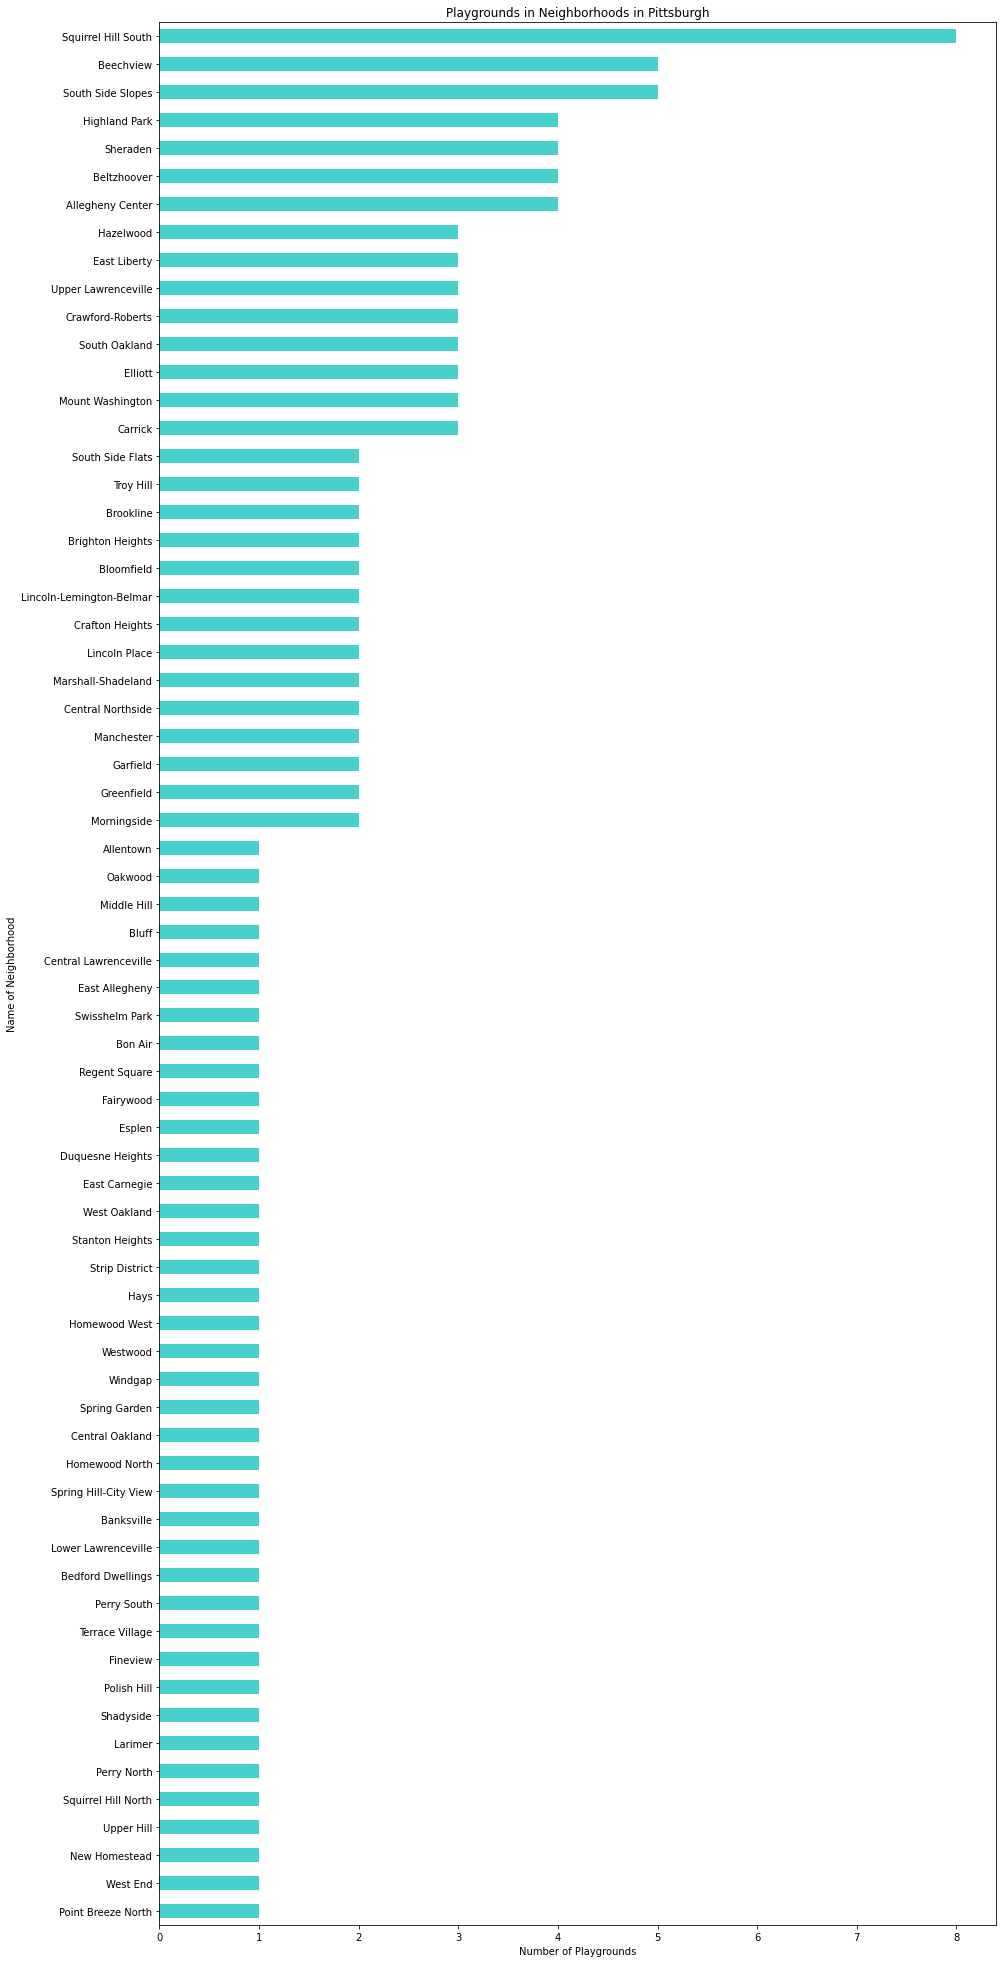

In [89]:
# Renames and reads Playgrounds.csv and Parks.csv
playgrounds = pd.read_csv("Playgrounds.csv", index_col="id")
df = pd.read_csv("Parks.csv", index_col="id")
# Plots a graph where the value_counts() gets how many parks in the neighborhood and renames the graph as ax for axis labeling
Playgrounds = playgrounds['neighborhood'].value_counts().sort_values()
ax = Playgrounds.plot(kind='barh', rot=0, figsize=(15,35), color = 'mediumturquoise')
ax.set_xlabel("Number of Playgrounds")
ax.set_ylabel("Name of Neighborhood")
plt.title("Playgrounds in Neighborhoods in Pittsburgh")

### Parks.csv Sorting
I started with the simple code below of seeing how many times each type of park shows up in the dataset.

Basketball (Full)    88
Name: type, dtype: int64

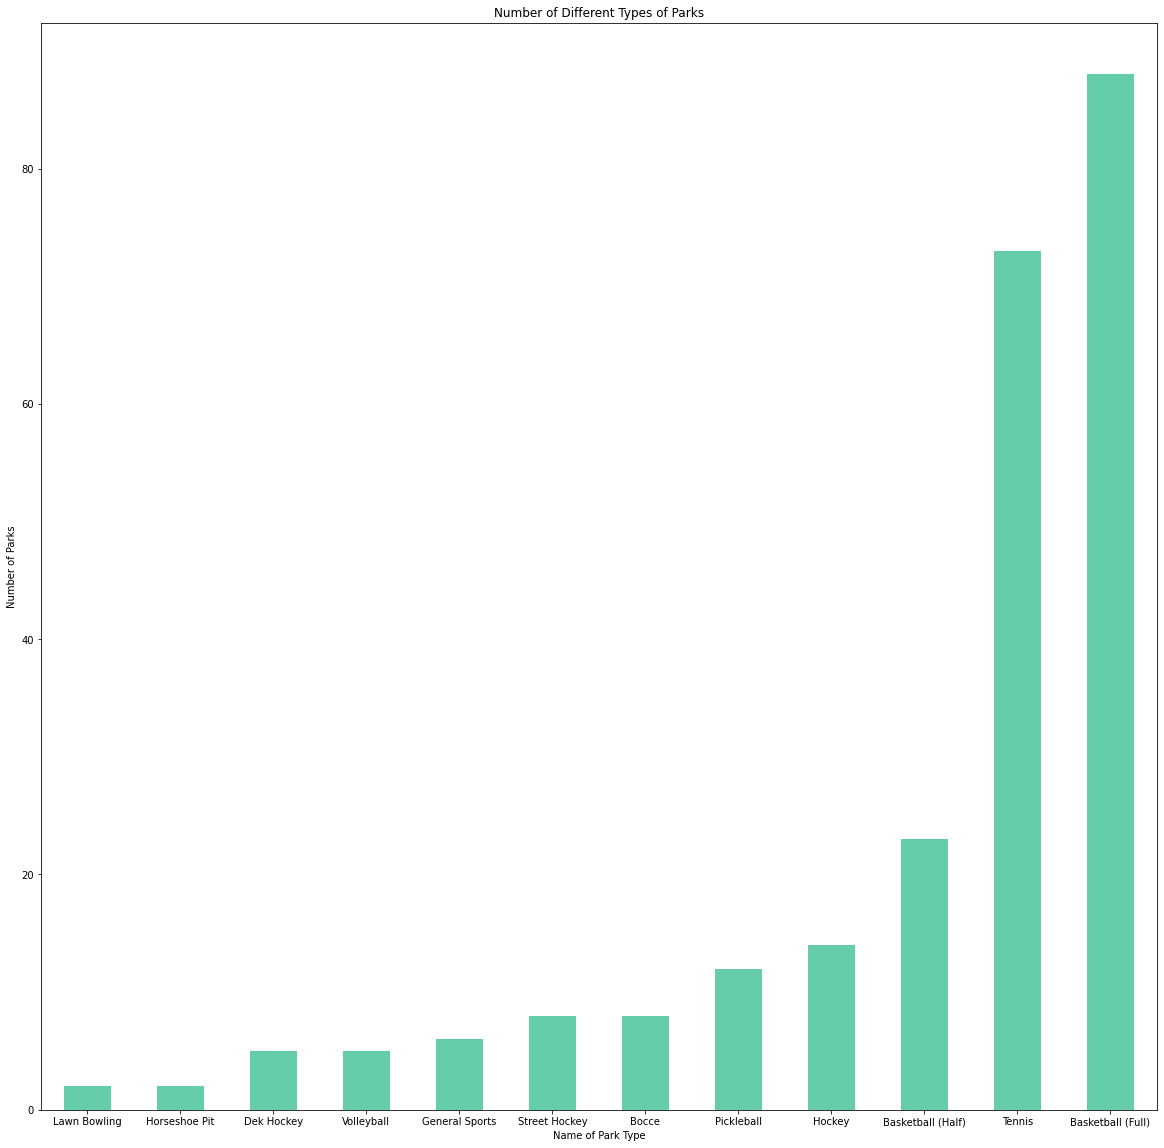

In [88]:
# Sorting the values in Parks.csv into type then counting number of each type
NumTypes = df['type'].value_counts().sort_values()
NumTypes_plot = NumTypes.plot(kind='bar', rot=0, figsize=(20,20), color = 'mediumaquamarine')
#Setting the graph labels
NumTypes_plot.set_xlabel('Name of Park Type')
NumTypes_plot.set_ylabel('Number of Parks')
plt.title('Number of Different Types of Parks')
NumTypes.tail(1)

![swish](https://media.giphy.com/media/l0OWiMGpoC6apZFXG/giphy.gif)

### Finding Number of Parks for each Neighborhood
A similar method to the playgrounds was used in just counting the amount of times each neighborhood is brought up in each dataset.

Text(0.5, 1.0, 'Number of Parks in each Neighborhood')

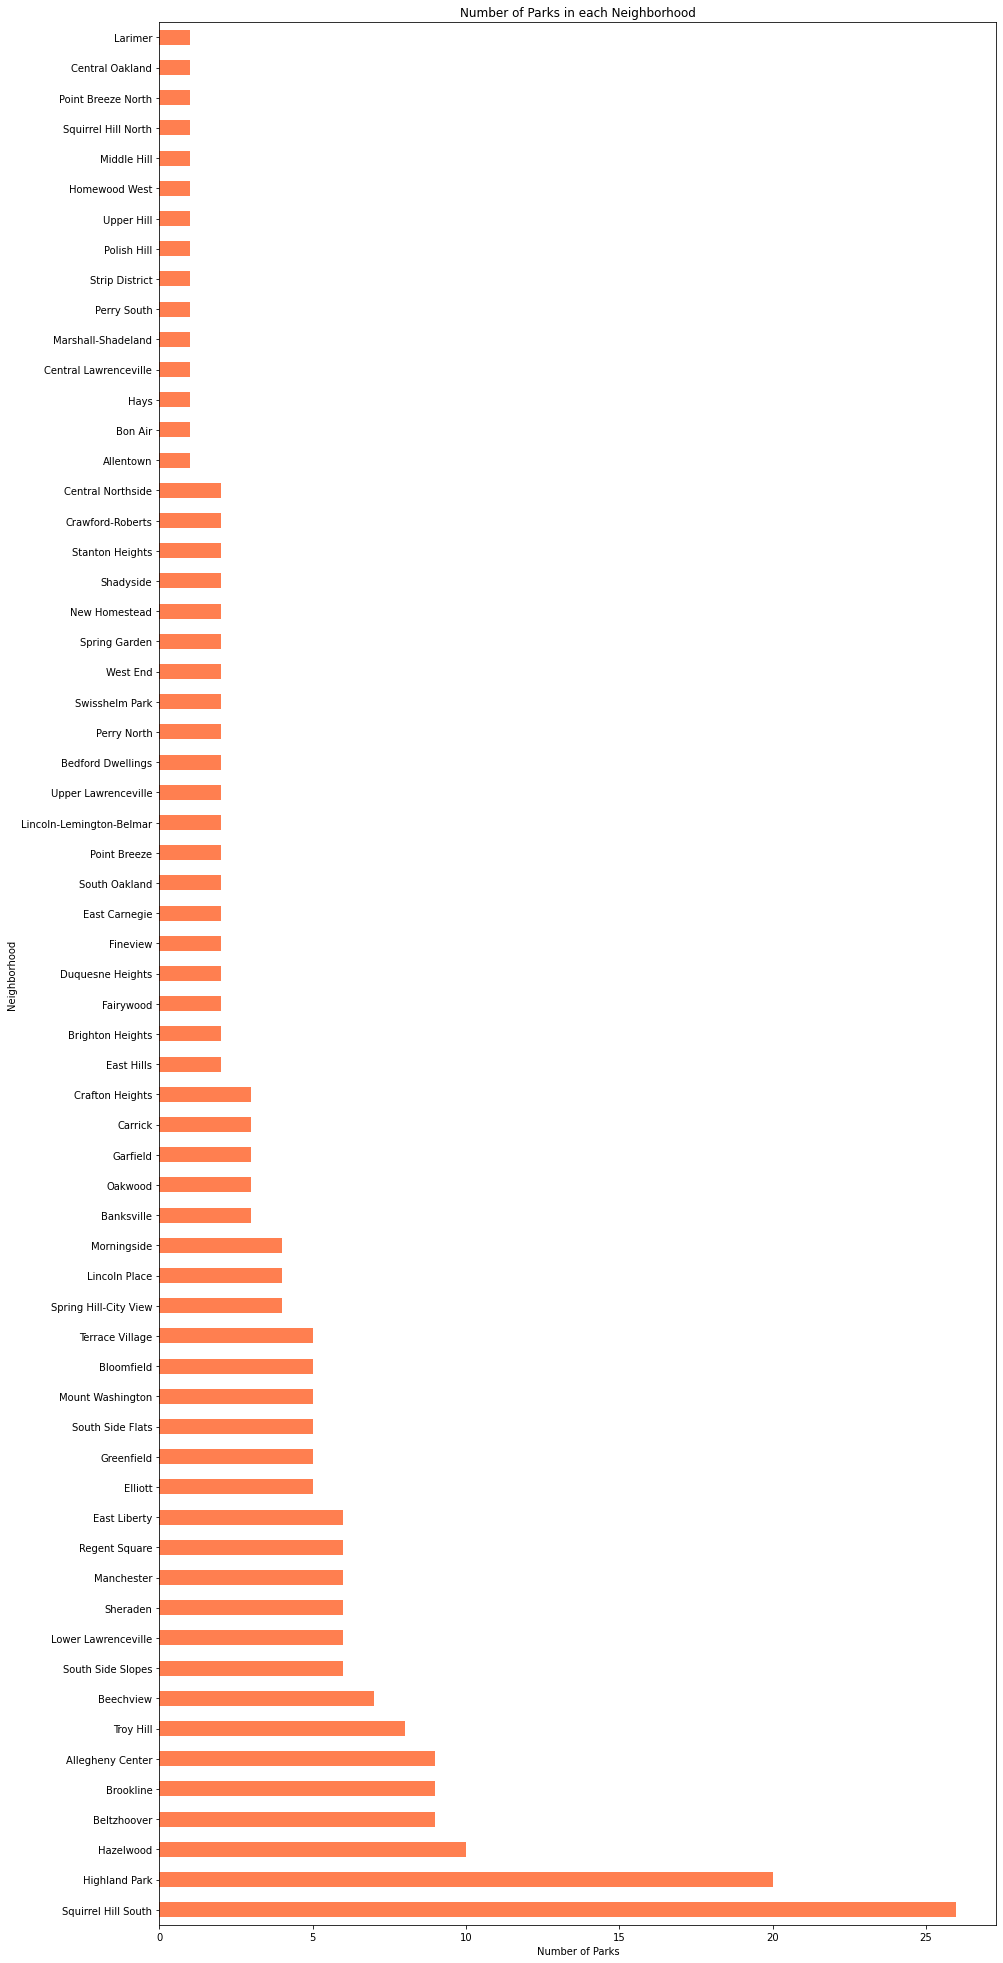

In [86]:
# Counting the number of time different neighborhoods pop up in Parks.csv
Parks = df['neighborhood'].value_counts().sort_values(ascending = False)
# Plotting and making the graph look all pretty
Parks_plot = Parks.plot(kind='barh', rot=0, figsize=(15,35), color = 'coral')
Parks_plot.set_xlabel('Number of Parks')
Parks_plot.set_ylabel('Neighborhood')
plt.title('Number of Parks in each Neighborhood')

In [52]:
# Top 3 totals
Parks.head(3)

Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Name: neighborhood, dtype: int64

In [53]:
# Bottom 3 totals
Parks.tail(3)

Point Breeze North    1
Central Oakland       1
Larimer               1
Name: neighborhood, dtype: int64

### Merging Parks and Playgrounds
Simply merging the data sorted from the two datasets wasn't enough. by just doing the merge there were two seperate columns and we were able to go around this by simply adding the columns together.

![combine](https://media.giphy.com/media/F2HvC4wRyuKrK/giphy.gif)

In [54]:
# Merging Parks and Playgrounds Totals
df = pd.merge(Parks, Playgrounds, right_index = True, left_index = True )
# Adding them together
df['neighborhood'] = df['neighborhood_x'] + df['neighborhood_y']
total_parks = df['neighborhood']

In [55]:
# Top 5
total_parks.sort_values(ascending= False).head(5)

Squirrel Hill South    34
Highland Park          24
Hazelwood              13
Beltzhoover            13
Allegheny Center       13
Name: neighborhood, dtype: int64

In [56]:
# Bottom 5
total_parks.sort_values(ascending= False).tail(5)

Middle Hill            2
Squirrel Hill North    2
Point Breeze North     2
Central Oakland        2
Larimer                2
Name: neighborhood, dtype: int64

## **Kids Enrolled in School**

As part of the best neighborhood for a kid to grow up in, one of the metrics we had to look at was enrollment in schools. We decided to look at enrollment in schools by neighborhood, as we decided a neighborhood with more children enrolled in schools would be "better." 

In [57]:
neighborhoodEnroll = pd.read_csv("neighborhood_enrollment.csv")

neighborhoodEnroll = neighborhoodEnroll.iloc[:, [0,8]] # Only care about these columns
neighborhoodEnroll = neighborhoodEnroll.dropna() # drop all rows that do not have data

First I make a dictionary and dataframe. Then loop through the dataframe and add the neighborhood to the ditcionary if it is not already there. If it is I add the number of kids enrolled to the key in the dictionary.

Text(0.5, 1.0, 'Number of Kids Enrolled in School by Neighborhood')

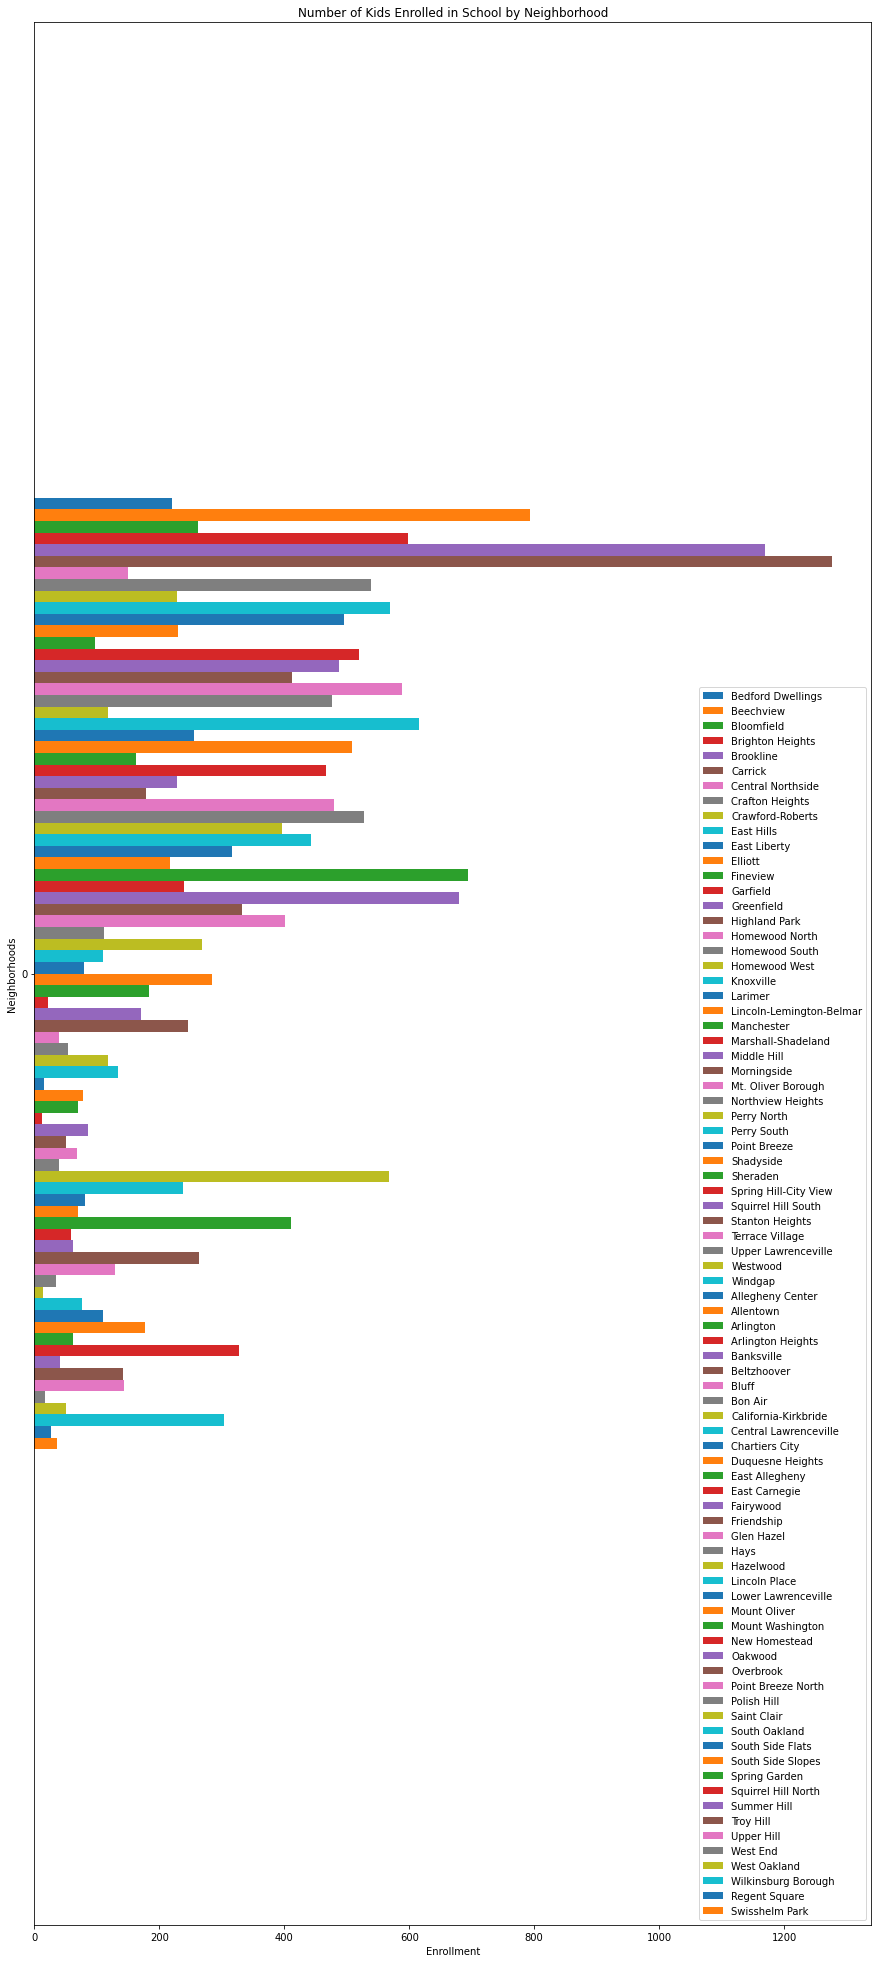

In [58]:
kidsSchools = {} # Make Dictionary
df = pd.DataFrame(neighborhoodEnroll)
for index, row in df.iterrows():
    try:
        kidsSchools[row['neighborhood']] += int(row['total_students_enrolled'])
    except:
        kidsSchools[row['neighborhood']] = int(row['total_students_enrolled'])

# Plot the dictionary data
data = pd.DataFrame(kidsSchools, index=[0])
ax = data.plot.barh(rot=0, figsize=(15,35))
ax.set_xlabel('Enrollment')
ax.set_ylabel('Neighborhoods')
ax.invert_yaxis()
plt.title('Number of Kids Enrolled in School by Neighborhood')

Since there is a lot going on in this chart. I decide to focus on the top ten neighborhoods with the highest number of kids enrolled in school ... 

Text(0, 0.5, 'Neighborhood')

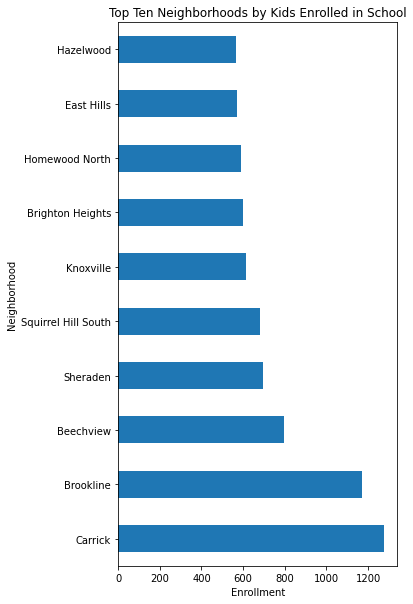

In [59]:
# Plot the ten neighborhoods with the highest number of kids enrolled
topTen = data.max().nlargest(10)
topTen.plot.barh(rot=0, figsize=(5,10))
plt.title('Top Ten Neighborhoods by Kids Enrolled in School')
plt.xlabel('Enrollment')
plt.ylabel('Neighborhood')

... As well as the ten neighborhoods with the least amount of kids enrolled in school.

Text(0, 0.5, 'Neighborhood')

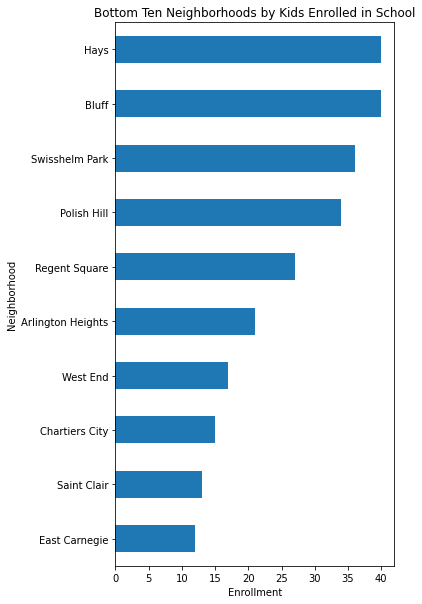

In [60]:
# Plot the ten neighborhoods with the lowest number of kids enrolled
bottomTen = data.min().nsmallest(10)
bottomTen.plot.barh(rot=0, figsize=(5,10))
plt.title('Bottom Ten Neighborhoods by Kids Enrolled in School')
plt.xlabel('Enrollment')
plt.ylabel('Neighborhood')

In [61]:
import pandas as pd # Import necessary libraries for geopandas
import geopandas
%matplotlib inline

neighborhoods = geopandas.read_file('Neighborhoods_.shp')

To use geopandas I make a new dataset that groups the number of kids enrolled by the neighborhood. Then I merge that with the map.

In [62]:
# Use groupby() to easily get the data
school_enroll = neighborhoodEnroll.groupby('neighborhood').sum()['total_students_enrolled']
school_enroll.sort_values(ascending=False)

schools_map = neighborhoods.merge(school_enroll, how='left', left_on='hood', right_on='neighborhood')
schools_map[['hood','total_students_enrolled']].head()

,hood,total_students_enrolled
0,Point Breeze North,129.0
1,Squirrel Hill North,328.0
2,Garfield,520.0
3,Bedford Dwellings,220.0
4,Knoxville,616.0


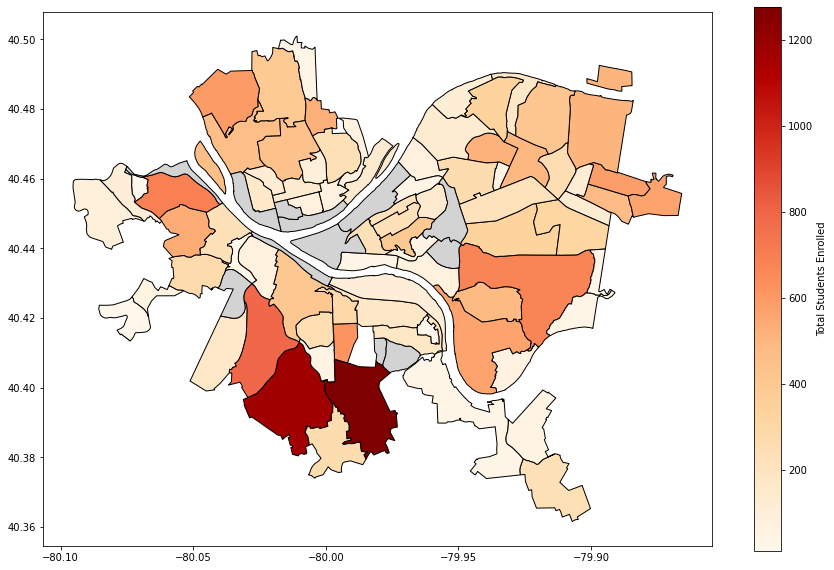

In [63]:
# Plot the map with the data I have
schools_map.plot(column='total_students_enrolled', 
               cmap='OrRd',              
               edgecolor="black",        
               legend=True,              
               legend_kwds={'label': "Total Students Enrolled"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} 
               )

Now, based on my data Carrick would be the best neighborhood because it has the highest number of kids enrolled. To make it fair for each neighborhood, I decided to look at the populations of each neighborhood and find the percentage of kids enrolled compared to the population.

In [64]:
# Get the data I need
populations = pd.read_csv("population-density.csv")
populations = populations.iloc[:, [0,9]]
df = pd.DataFrame(populations)

pop_data = df.set_index('Neighborhood').T.to_dict('records')[0]
# Because of how the CSV is formatted I had to get rid of the commas in numbers > 1,000
for key in pop_data:
    pop_data[key] = pop_data[key].replace(',', '')


In [65]:
school_percents = {}
# If the neighborhood is in both datasets find the percentage and add it to the dictionary
for key in pop_data:
    if key in pop_data and key in kidsSchools:
        school_percents[key] = (kidsSchools[key] / int(pop_data[key])) * 100


Text(0, 0.5, 'Neighborhood')

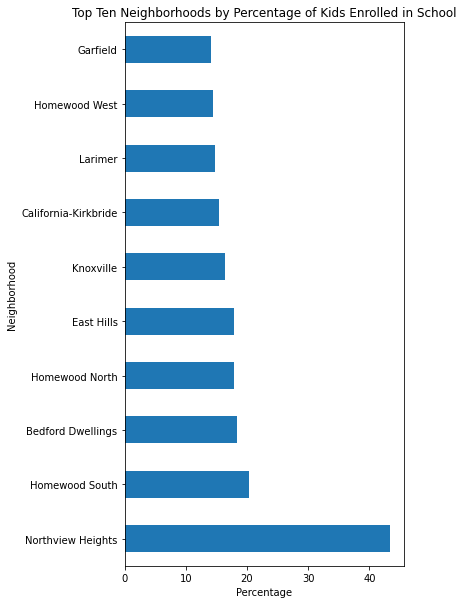

In [66]:
# Plot top ten neighborhoods with highest percentage of kids enrolled in school
s = pd.DataFrame(school_percents, index=[0])
topTenPers = s.max().nlargest(10)
topTenPers.plot.barh(rot=0, figsize=(5,10))
plt.title('Top Ten Neighborhoods by Percentage of Kids Enrolled in School')
plt.xlabel('Percentage')
plt.ylabel('Neighborhood')

After using the percentage of population, Northview Heights comes out as the winner with roughly 43% of their population being children enrolled in schools.

In [67]:
# Get data ready for geopandas
school_series = pd.DataFrame(school_percents.items(), columns=['Neighborhood', 'Percent'])
school_percentages = school_series.groupby('Neighborhood').sum()['Percent']
s = school_percentages.sort_values(ascending=False)

percentages_map = neighborhoods.merge(school_percentages, how='left', left_on='hood', right_on='Neighborhood')
percentages_map[['hood','Percent']].head()

,hood,Percent
0,Point Breeze North,6.280428
1,Squirrel Hill North,2.886562
2,Garfield,14.149660
3,Bedford Dwellings,18.302829
4,Knoxville,16.439819


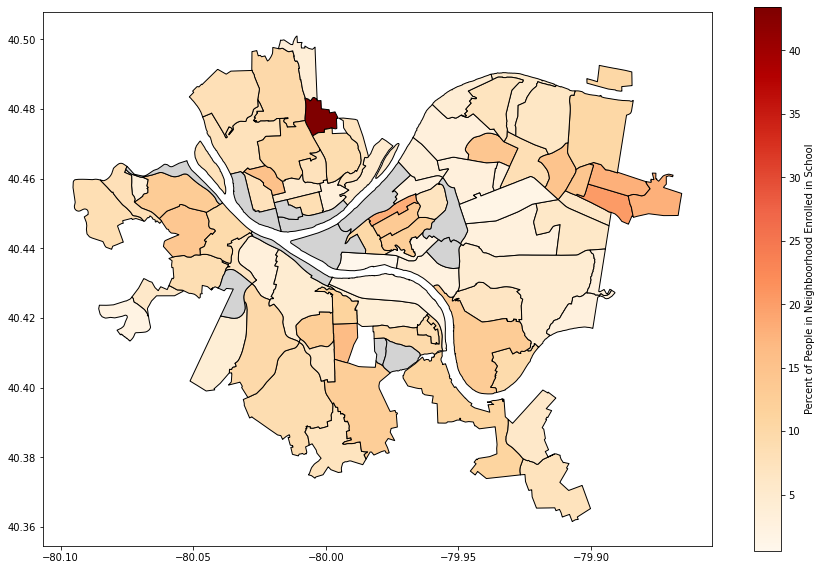

In [68]:
# Show the data on a map
percentages_map.plot(column='Percent', 
               cmap='OrRd',              
               edgecolor="black",       
               legend=True,              
               legend_kwds={'label': "Percent of People in Neighboorhood Enrolled in School"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

After looking at a map, it is clear that Northview Heights is an outlier for their percentage. However, they do have the highest percentage so based on the neighborhood enrollment metric, they are the best.

## **Combination**

![fusion](https://media.giphy.com/media/P4TqKx6NHyLnO/giphy.gif)

For the combination of our data, we decided to find the ratio of students enrolled in school to the total number of parks and playgrounds by neighborhood. We decided the lowest ratio would be best becuase that'd mean there's more parks per kids.

In [69]:
enroll_data = pd.Series(kidsSchools) # Convert both to series (easier to look at data)
total_Parks = pd.Series(total_parks)

To analyze the data we divided the number of kids enrolled by the number of total parks and playgrounds. Also, we made sure the neighborhood had greater than 200 kids.

In [70]:
ratio = {}
for index, value in enroll_data.iteritems():
    if index in enroll_data and index in total_Parks and enroll_data[index] > 200:
        try:
            ratio[index] = float(enroll_data[index] / total_Parks[index])
        except:
            pass


In [71]:
series = pd.Series(ratio) # Convert dict to series
series.sort_values().head() # Show 5 lowest ratios

Highland Park          17.166667
Beltzhoover            18.846154
Squirrel Hill South    19.970588
Elliott                28.625000
Bloomfield             37.285714
dtype: float64

<Figure size 2520x1440 with 0 Axes>

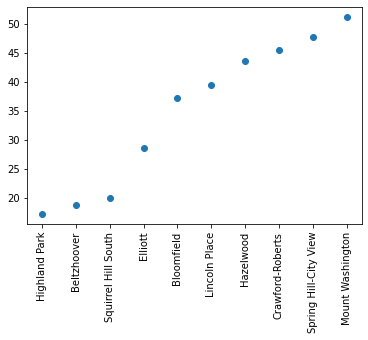

<Figure size 2520x1440 with 0 Axes>

In [72]:
# Make a scatter plot of the ten neighborhoods with the lowest ratio
df = series.to_frame()
new_column_names = ['Ratio']
df.columns = new_column_names
lowest = df.sort_values(by='Ratio').head(10)
plt.scatter(lowest.index, lowest['Ratio'])
plt.xticks(rotation = 90)
plt.figure(figsize=(35,20))

As you can see, Highland Park has the best ratio of kids to parks at roughly 17 kids per park

## **Conclusion**

### The Best Neighborhood in Pittsburgh is: Highland Park

Paul: As someone not from the Pittsburgh area and has not been around all of Pittsburgh yet, I do not know anything about Highland Park. However, after looking at pictures online it does look like a very nice nieghborhood, so I can understand our data led us to it. Based on these pictures, I do agree that Highland Park is the best neighborhood in Pittsburgh.

Wes: After considering all of our data and looking at Highland Park, I am happy with our conclusion. It is amazing to me that we were able to get to a solid conclusion while having some unique metrics. Overall, I do agree with our conclusion with Highland Park on top.

![nice](https://media.giphy.com/media/qPcX2mzk3NmjC/giphy.gif)